In [ ]:
import sympy
from scipy import optimize
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class Optimization:
    def __init__(self, U, p, q, I, constraint_x=0, constraint_y=0):
        self.U = U
        self.p = p
        self.q = q
        self.I = I

        self.constraints_x = constraint_x
        self.constraints_y = constraint_y

        self.sym_U = sympy.parse_expr(U)
        self.lambd_U = sympy.lambdify(['x', 'y'], self.sym_U)
        self.constraints = [{'type': 'ineq', 'fun': lambda x: I - p * x[0] - q * x[1]}]

        self.optimize_x, \
        self.optimize_y, \
        self.optimize_U = self.find_optimum()

        self.surface_plot, \
        self.contour_plot = self._create_plots()




    def __repr__(self):
        return f'Ответ. M* ({self.optimize_x, self.optimize_y}); U(M*) = {self.optimize_U}'


    def find_optimum(self):
        res = optimize.minimize(lambda x: -self.lambd_U(x[0], x[1]), (self.constraints_x, self.constraints_y), constraints=self.constraints)
        optimize_x = res.x[0]
        optimize_y = res.x[1]
        return optimize_x, optimize_y, self.lambd_U(optimize_x, optimize_y)


    def _create_data(self):
        x = np.linspace(1, 100, 100)
        y = np.linspace(1, 100, 100)

        X, Y = np.meshgrid(x, y) # Определение координатных векторов
        Z = np.vectorize(self.lambd_U)(X, Y) # Векторизуем функцию и подадим массивы в качестве параметров

        return x,y,Z


    def _create_plots(self):
            scene = go.Scene(
            xaxis = {'title': 'Цена единицы товара x1'},
            yaxis = {'title': 'Цена единицы товара x2'},
            zaxis = {'title': 'Полезность'})

            layout = go.Layout(title="График функции полезности",scene=scene)

            x, y, Z = self._create_data()

            return self._create_surface_plot(x,y,Z, layout), lambda : self._show_contour_plot(x, y, Z)


    def _create_surface_plot(self, x, y, Z, layout) -> go.Figure:
        surf = go.Surface(x=x, y=y, z=Z)
        scatter_3d = go.Scatter3d(x=[self.optimize_x],
                                  y=[self.optimize_y],
                                  z=[self.optimize_U],
                                  mode="markers+text",
                                  text=[f'M* ({self.optimize_x},{self.optimize_y})']
                                  )
        fig = go.Figure(data=[surf,scatter_3d], layout=layout)
        return fig


    def _show_contour_plot(self, x, y, Z):
        fig, ax = plt.subplots()
        ax.contour(x, y, Z, levels=10)
        x1 = np.linspace(q+1, (I/p))
        y_treug = (I - p * x1) / q
        y_2 = 0
        fig2 = ax.fill_between(x1, y_2, y_treug)
        fig2.set_facecolor('green')
        fig2.set_label("бюджетное ограничение")
        cr = ax.contour(x, y, Z, levels=[self.optimize_U], colors="red")
        cr.collections[0].set_label("Кривая безразличия")
        fig.set_figwidth(6)
        fig.set_figheight(6)
        plt.title("График функции полезности")
        plt.xlabel("Цена единицы товара x1")
        plt.ylabel("Цена единицы товара x2")
        plt.plot(self.optimize_x, self.optimize_y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
        plt.text(self.optimize_x + 50,self.optimize_y + 30,f'M*{self.optimize_x, self.optimize_y}',horizontalalignment='right')
        plt.legend()
        plt.show()


In [120]:
U = "5 * ln(x - 3) + 8 * ln(y - 3)"
p = 15
q = 4
I = 422
opt = Optimization(U, p, q, I, 4, 4)
opt

43.406439949738555


<lambdifygenerated-40>:2: RuntimeWarning:

invalid value encountered in log

<lambdifygenerated-40>:2: RuntimeWarning:

divide by zero encountered in log



Ответ. M* ((12.35911918880942, 59.153303041964605)); U(M*) = 43.406439949738555

In [121]:
opt.surface_plot

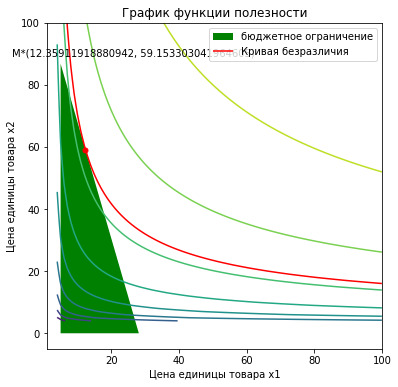

In [88]:
opt.contour_plot()

In [82]:
import plotly.graph_objs as go
import numpy as np
z = np.linspace(0, 10, 50)
x = np.cos(z)
y = np.sin(z)
trace = go.Scatter3d(
   x = [0], y = [0.1], z = [0.1],mode = 'markers', marker = dict(
      size = 12,
      color = z, # set color to an array/list of desired values
      colorscale = 'Viridis'
      )
   )
layout = go.Layout(title = '3D Scatter plot')
fig = go.Figure(data = [trace], layout = layout)
fig.show()
z

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])